<a id='dataset'></a>
## 3. Dataset e Bibliotecas
Para esta aula, utilizaremos um [dataset do Kaggle](https://www.kaggle.com/shivam2503/diamonds). Se você ainda não o conhece, o [Kaggle](https://www.kaggle.com/) é um site fantástico para fazer **projetos de ciência de dados**, explorar os projetos de outras pessoas, conhecer pessoas e conversar em fóruns, participar de **competições de Data Science** e até ganhar prêmios! Quem sabe até o final do curso da VAI Academy, você poderá até ser capaz de ganhar um desses concursos!

Sabemos que a primeira vista, o Kaggle pode parecer ameaçador para quem não tem experiência, por estar cheio de projetos complexos e especialistas em Data Science competindo há algum tempo, mas não se assuste! A melhor forma de aprender Data Science é com a prática, e o Kaggle é um ótimo lugar para isso. Uma boa forma de começar é com alguns projetos simples (você pode ver algumas referências no link de [Datasets e Notebooks tutoriais no Kaggle para iniciantes](https://www.kaggle.com/m2skills/datasets-and-tutorial-kernels-for-beginners)) ou entrando no curso da VAI Academy!

O dataset com o qual iremos trabalhar nessa aula contém características de diamantes. O arquivo está em anexo e se chama `diamonds.csv`! Caso prefira, você pode baixar do próprio Kaggle após criar uma conta no site e clicar em download para baixar o arquivo no link acima! As colunas do dataset são as seguintes:

1. **carat**: são os quilates do diamante, um indicador de peso. Um quilate equivale à 200 gramas.
2. **cut**: Classificação de qualidade do diamante, onde a ordem de pior para melhor qualidade é Fair, Good, Very Good, Premium, Ideal
3. **color**: classificação da cor do diamante, vai em ordem alfabética onde D é a melhor qualidade e J a pior
4. **clarity**: indica o quão livre de impurezas o diamante é, a ordem de melhor para pior é FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
5. **depth**: a altura do diamante, dividida pelo diâmetro
6. **table**: a largura do diamante, dividida pelo diâmetro
7. **price**: preço do diamante em dólares
8. **x**: largura em mm
9. **y**: altura em mm
10. **z**: profundidade em mm

Além disso também uma coluna sem nome que contém o número da linha. Podemos ignorá-la sem problemas!

Dado que estamos trabalhando com Estatística, além das bibliotecas NumPy e Pandas, iremos utilizar algumas bibliotecas comuns para usar algumas funções úteis para nós. Estas são:
* **Math**: possui uma ampla variedade de funções matemáticas tais como exponencial (exp), raiz quadrada (sqrt), ...
* **SciPy**: biblioteca fundamental para computação científica (também nos fornece funções estatísticas)
* **Random**: biblioteca útil para gerar números aleatórios
* **Matplotlib**: uma das bibliotecas mais populares para plotagem de gráficos em Python

Além disso, não se preocupe se não compreender completamente os códigos para a plotagem nessa aula. Nas próximas aulas explicaremos melhor como fazer os mais diversos plots. Foque em tentar entender os conceitos e a lógica dos códigos.

#### Exercício de aquecimento
Importe NumPy e Pandas, e printe as 10 primeiras linhas do dataset (usando o comando `head()` - não há necessidade de usar a função `print()`).

In [1]:
# Importando as bibliotecas utilizadas
# OBS: É uma boa prática importar todas as bibliotecas necessárias
# em uma célula única no começo do notebook
!pip install matplotlib
import math
import matplotlib.pyplot as plt
from numpy.random import seed, rand, normal, exponential, binomial, poisson
import random
import scipy.stats as stats
from scipy.stats import ttest_ind, normaltest, pearsonr

# Printar os plots dentro das células do notebook
%matplotlib inline

# Escreva sua resposta aqui:
import numpy as np # Importe NumPy
import pandas as pd # Importe Pandas

# No Google Colab, lembre-se de fazer o upload o arquivo de dados
diamond_df = pd.read_csv('diamond.csv', sep=',')

# Sua resposta aqui também:
diamond_df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


<a id='descstats'></a>
## 4. Estatística descritiva
Vamos iniciar o conteúdo falando sobre a **Estatística descritiva**. Como apresentado acima, essa área **nos dá insights úteis e revela padrões** presentes nos dados que nem sempre são intuitivos e explícitos. 

<a id='variables'></a>
### 4.1 Tipos de variáveis

Primeiro, vamos explicar o que são as tão faladas **variáveis**. Quando coletamos dados de uma amostra populacional, geralmente analisamos não apenas as características principais dessa amostra, mas também diversas outras informações que auxiliarão no entendimento desta característica. Assim, **uma variável é cada uma das características ou *features* das amostras no conjunto de dados**.

As **variáveis** podem assumir diferentes formatos, e basicamente podem ser separadas em **quantitativas** ou **qualitativas**.

Você consegue dizer qual a diferença entre elas?

Se você disse "Claro que consigo, uma variável quantitativas é uma variável com quantidades e uma variável qualitativas fala de qualidades", você tem toda a razão! Mas caso você não tenha pego logo de cara, com exemplos tudo fica mais fácil. Vamos começar analisando dois exemplos simples:

**Lançar um dado:** Imagine que medimos diversos resultados do lançamento de um dado. Quando um dado é lançado, existem seis resultados possíveis (eu sei, eu sei, se você for um jogador de D&D, você pode discordar). Como cada resultado possível é um número, podemos afirmar que o resultado do lançamento de um dado é uma variável numérica.

**Tipo sanguíneo:** Agora imagine que no dataset que estamos analisando existam os dados de tipos sanguíneo de cada um dos pacientes. Como o tipo de sangue de cada indivíduo só pode estar entre as categorias A, B, AB ou O, este é um exemplo de variável categórica.

Essas duas classes podem possuir algumas subdivisões que estão descritas abaixo.

<img src="https://i.imgur.com/wAzvtcC.png" alt="variables" width="450"/>

Enquanto uma variável quantitativa, ou numérica, pode ser discreta ou contínua, uma variável qualitativa, ou categórica, pode ser nominal ou ordinal. Você pode estar se perguntando "Qual é o significado de cada uma destas subclasses?". Bem, aqui vai uma definição simples de cada uma delas:

**Numérica - discreta:** como discutido acima, uma variável numérica expressa quantidades e, por discreto, queremos dizer que seus valores são contáveis (por exemplo, os resultados de um dado ou o número de habitantes no planeta).

**Numérica - contínua:** também são valores constituídos por quantidades, mas uma variável contínua é incontável, com infinitos valores possíveis e tendo que ser mensuradas (por exemplo os preços de ações ou o peso de indivíduos).

**Categórica - nominal:** lembre-se que as variáveis categóricas não têm valores numéricos e expressam qualidades, e as nominais não têm qualquer tipo de hierarquia (por exemplo, tipo de sangue).

**Categórica - ordinal:** As variáveis ordinais têm hierarquia (por exemplo, o desempenho de um cientista de dados durante o semestre pode ser alto, médio ou baixo).

##### Exercício 4.1

Vamos praticar para internalizar o conceito? Preencha o código abaixo com o tipo de cada uma das variáveis do exercício.

In [46]:
# Que tipo de variáveis constituem cada exemplo abaixo?
types = [
         "Numérica - Contínua",   # índice: 0
         "Numérica - Discreta",   # índice: 1
         "Categórica - Nominal",  # índice: 2
         "Categórica - Ordinal"   # índice: 3
         ]

# EXEMPLOS
# Exemplo 0: Resultados de lançar uma moeda
kind_ex0 = "Categórica - Nominal" # não esqueça de usar os valores idênticos aos da lista "types"
# Por quê? - Categórica --> Os resultados possíveis são "cara" ou "coroa. não numéricos. Nominal --> não há hierarquia
print("O lançamento de uma moeda é uma variável " + kind_ex0)

# Exemplo 1: Tipo sanguíneo
# para não precisar copiar e colar, você pode até usar os índices da lista 'types'
kind_ex1 = types[2] # ou kind_ex1 = "Categórica - Nominal" (como preferir)
print("O tipo sanguíneo de alguém é uma variável " + kind_ex1)

# EXERCÍCIOS
#1 - Tamanho do sapato (Ex: 39, 43, 44) (desconsidere alguém que calce 39/40)
kind_1 = 'Numérica - Discreta'
print("O tamanho do sapato de uma pessoa é uma variável " + kind_1)

#2 - Peso dos itens de uma loja (em kg)
kind_2 = 'Numérica - Contínua'
print("O peso dos itens de uma loja são uma variável " + kind_2)

#3 - Resultados de uma pesquisa de satisfação do cliente
# Considere que o questionário tinha as categorias: ['Não satisfeito', 'Indiferente', 'Muito satisfeito']
kind_3 = 'Categórica - Ordinal'
print("A satisfação do cliente é uma variável " + kind_3)

#4 - O estado onde alguém mora
kind_4 = 'Categórica - Nominal'
print("O estado em que uma pessoa vive é uma variável " + kind_4)

#5 - A variável 'carat' (quilates de um diamante) do dadaset
kind_5 = 'Numérica - Contínua'
print("A variável 'carat' (quilates) é uma variável " + kind_5)

#6 - A variável 'cut' do dataset
kind_6 = 'Categórica - Ordinal' # tente visualizar os valores da variável no dataset
print("A variável 'cut' é uma variável " + kind_6)

O lançamento de uma moeda é uma variável Categórica - Nominal
O tipo sanguíneo de alguém é uma variável Categórica - Nominal
O tamanho do sapato de uma pessoa é uma variável Numérica - Discreta
O peso dos itens de uma loja são uma variável Numérica - Contínua
A satisfação do cliente é uma variável Categórica - Ordinal
O estado em que uma pessoa vive é uma variável Categórica - Nominal
A variável 'carat' (quilates) é uma variável Numérica - Contínua
A variável 'cut' é uma variável Categórica - Ordinal



### 4.2. Tabela de distribuição de frequência
Em estatística, a **frequência** de um valor corresponde ao **número de vezes que este ocorreu no dataset**. Assim, a **tabela de frequência** é uma forma de **organizar as frequências dos valores presentes**.

Felizmente, a biblioteca Pandas tem um método chamado [`crosstab`](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) para a construção dessas tabelas.

As tabelas de frequência são **muito utilizadas em variáveis categóricas**, ou variáveis **numéricas discretas**, mas também podemos utilizá-las com **variáveis numéricas contínuas**. O lado negativo dessa última aplicação, porém, é que há uma certa **perda de informação**, uma vez que temos de **agrupar os valores numéricos em classes cada uma com diferentes intervalos de valores**.

A razão para fazer isso é que as variáveis numéricas contínuas podem assumir uma **infinidade de valores diferentes**. Pense, por exemplo, em um número que esteja entre 0 e 1. Qual a probabilidade de esse número ser exatamente um igual a um outro qualquer desse intervalo, digamos 0,987140293417239847120394182343? Por outro lado, e se agora pensarmos na probabilidades de este valor estar entre 0 e 0,3? As chances são muito maiores, certo? Por isso, em geral, na tabela de frequência de variáveis numéricas, tentamos agrupá-las em intervalos de classes ao invés de contar a frequência de cada valor. Este é um conceito chave e será novamente abordado mais tarde.

**Exemplo**: Uma variável que varia de, digamos, 0 a 100, poderia ser agregada pelos intervalos de classe

<center>
    A = [0,25) <br>
    B = [25,50)  <br>
    C = [50,75)  <br>
    D = [75, 100]
</center>

A perda de informação deve-se ao fato de que saber a que intervalo de classe pertence um determinado exemplo não nos informa sobre o seu valor específico.


#### 4.2.1. Tabelas unidimensionais
Aqui realizamos uma análise univariada, ou seja, apresentando as frequências de apenas uma única variável. Veja o exemplo abaixo:

In [3]:
pd.crosstab(index=diamond_df["cut"], columns="count")

col_0,count
cut,
Fair,1610
Good,4906
Ideal,21551
Premium,13791
Very Good,12082


Note que essa análise também pode ser feita utilizando a função `group`, que vimos nas aulas passadas.

In [4]:
grouped = diamond_df.groupby('cut')
grouped.size()

cut
Fair          1610
Good          4906
Ideal        21551
Premium      13791
Very Good    12082
dtype: int64

Embora tecnicamente esta seja uma variável numérica, ela representa uma variável categórica (Qualidade do diamante) e, **o mais importante é que ela não assume uma ampla gama de valores**.

Além disso, com a função crosstab podemos ver como os dados estão distribuidos normalizando os dados. Veja o exemplo abaixo

In [5]:
pd.crosstab(index=diamond_df["cut"], columns="count", normalize=True)

col_0,count
cut,
Fair,0.029848
Good,0.090953
Ideal,0.399537
Premium,0.255673
Very Good,0.223990


##### Exercício 4.2
Agora tente fazer uma tabela de frequência dos quilates dos diamantes (variável `carat`).

Obs.: Não é preciso normalizar os dados.

In [6]:
# Escreva sua resposta aqui:
freq_tab = pd.crosstab(index=diamond_df["carat"], columns="count", normalize=False).reset_index()
freq_tab

col_0,carat,count
0,0.20,12
1,0.21,9
2,0.22,5
3,0.23,293
4,0.24,254
...,...,...
268,4.00,1
269,4.01,2
270,4.13,1
271,4.50,1


Bem inútil, não é? Isto porque esta variável numérica tem uma ampla gama de valores (0.20 até 5.01)! Para uma melhor análise, vamos agregar isso em alguns intervalos de classe.

##### Exercício 4.3
Tente compreender a função definida, `class_interval()`. Então, crie uma nova coluna no dataframe `diamond_df` para os intervalos de classe (também conhecidos como *bins*) da variável **carat** utilizando a função com o método `apply()`, aprendido nas aulas passadas. Você pode usar o valor default para `nbins`.

In [7]:
def class_interval(var, min_value, max_value, nbins=5):
    bin_width = (max_value - min_value)/nbins
    n = (var-min_value)//bin_width  # a//b retorna a parte inteira da divisão a/b
    if n == nbins:                  # trata a exceção quando var == max_value
        n -= 1                      # a bin correspondente deve ser a última (n -= 1 é a mesma coisa que escrever que n = n - 1)
    lower_bound = min_value + bin_width*n
    upper_bound = min_value + bin_width*(n+1)
    
    return str(round(lower_bound,2)) + ' - ' + str(round(upper_bound,2))
min_value = diamond_df.carat.min()
max_value = diamond_df.carat.max()
diamond_df['carat_class'] = diamond_df['carat'].apply(lambda row:class_interval(row,min_value,max_value))
diamond_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,carat_class
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.2 - 1.16
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.2 - 1.16
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.2 - 1.16
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.2 - 1.16
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.2 - 1.16


##### Exercício 4.4 
Crie, então, a tabela de frequência unidimensional dos quilates dos diamantes (variável `carat`) utilizando os intervalos de classe que acabamos de definir (variável `carat_class`).

Você pode testar variar o número de intervalos de classe `nbins` e ver como a sua tabela de frequência varia. Mas, antes de submeter, lembre-se de retornar a utilizar o número de intervalos de classe padrão (`nbins=4`).

Obs.: Não é preciso normalizar os dados.

In [8]:
# Escreva sua resposta aqui:freq_tab = pd.crosstab(index=diamond_df["carat"], columns="count", normalize=False).reset_index()

carat_crosstab = pd.crosstab(index=diamond_df['carat_class'], columns='count', normalize=False).reset_index()
carat_crosstab

col_0,carat_class,count
0,0.2 - 1.16,43781
1,1.16 - 2.12,9478
2,2.12 - 3.09,667
3,3.09 - 4.05,11
4,4.05 - 5.01,3


Muito melhor, não é?

#### 4.2.2. Tabelas Cruzadas
Em alguns casos, é útil verificar a **distribuição de frequência de pares de valores**. Para isso, utilizamos a **tabela cruzada** (também chamada de tabela de dois caminhos, bidirecionais, ou pivô), que nos ajuda a resumir e exibir uma grande quantidade de dados de forma estruturada.

Digamos que desejamos analisar os diferentes pares de valores de duas variáveis diferentes. No nosso dataset, por exemplo, temos as informações sobre qualidade do diamante (cut) e os quilates (carat). Então, o par ('Premium', 0.2) e ('Premium', 2.0) representariam valores de pares diferentes.

Em Pandas, podemos fazer isto da seguinte forma:

In [9]:
pd.crosstab(index=diamond_df['cut'], columns=diamond_df['carat_class'])

carat_class,0.2 - 1.16,1.16 - 2.12,2.12 - 3.09,3.09 - 4.05,4.05 - 5.01
cut,,,,,
Fair,1194,365,45,3,3
Good,4035,823,48,0,0
Ideal,18433,2930,186,2,0
Premium,10232,3278,276,5,0
Very Good,9887,2082,112,1,0


Usando a opção `margins` podemos adicionar os uma linha e coluna que refletem a visão para todos as qualidades e para todas as opções de nossa nova variável `carat_class`.

In [10]:
pd.crosstab(index=diamond_df['cut'], columns=diamond_df['carat_class'], margins=True)

carat_class,0.2 - 1.16,1.16 - 2.12,2.12 - 3.09,3.09 - 4.05,4.05 - 5.01,All
cut,,,,,,
Fair,1194,365,45,3,3,1610
Good,4035,823,48,0,0,4906
Ideal,18433,2930,186,2,0,21551
Premium,10232,3278,276,5,0,13791
Very Good,9887,2082,112,1,0,12082
All,43781,9478,667,11,3,53940


In [11]:
pd.crosstab(index=diamond_df['cut'], columns=diamond_df['carat_class'], margins=True, normalize=True).round(2)

carat_class,0.2 - 1.16,1.16 - 2.12,2.12 - 3.09,3.09 - 4.05,4.05 - 5.01,All
cut,,,,,,
Fair,0.02,0.01,0.00,0.0,0.0,0.03
Good,0.07,0.02,0.00,0.0,0.0,0.09
Ideal,0.34,0.05,0.00,0.0,0.0,0.40
Premium,0.19,0.06,0.01,0.0,0.0,0.26
Very Good,0.18,0.04,0.00,0.0,0.0,0.22
All,0.81,0.18,0.01,0.0,0.0,1.00


Viu só? A tabela cruzada nos permite resumir de forma simples algumas relações entre diferentes variáveis do dataset. Se analisássemos essas duas colunas de forma separada, por exemplo, não conseguiríamos encontrar relações entre as distribuições dessas duas variáveis

Agora uma análise que podemos fazer é ver se o **preço** tem relação com os quilates de um diamante! Tente usar aquela função construída acima *class_interval* para criarmos intervalos de classe para essa variável e construir uma crosstab com a variável *carat_class* que criamos!

Esse exercício é totalmente opcional!

In [12]:
min_value = diamond_df.price.min()
max_value = diamond_df.price.max()
diamond_df['price_class'] = diamond_df.price.apply(lambda x: class_interval(x, min_value, max_value, nbins=5))

price_carat_crosstab = pd.crosstab(index=diamond_df['price_class'], columns=diamond_df['carat_class'])
price_carat_crosstab

carat_class,0.2 - 1.16,1.16 - 2.12,2.12 - 3.09,3.09 - 4.05,4.05 - 5.01
price_class,,,,,
11424.2 - 15123.6,93,1994,217,4,0
15123.6 - 18823.0,25,1168,387,6,3
326.0 - 4025.4,34532,131,0,0,0
4025.4 - 7724.8,8162,3090,19,0,0
7724.8 - 11424.2,969,3095,44,1,0


Um passo muito importante do trabalho de um cientista de dados é analisar os dados e visualizações geradas! Pense nessas análises que geramos até agora e anote em um papel o que você extraiu sobre os diamantes, em relação às variáveis de preço, quilates e qualidade dos diamantes!

Não tem certo ou errado, o interessante é ver o que você já conseguiu descobrir e quem sabe conseguiremos entender o que torna um diamante tão caro, usando apenas estatística!

#### 4.2.3. Histograma

Uma outra forma de **apresentar frequências** é através de uma visualização gráfica chamada **histograma**. Este tipo de gráfico é muito utilizado na estatística e é útil para o **entendimento da distribuição dos valores no dataset**.

O histograma consiste em um gráfico de barras que demonstra uma distribuição de frequências, onde o eixo x apresenta as diferentes classes da variável - sejam elas valores diferentes para os dados categóricos, ou os intervalos de classe (*bins*) para os dados numéricos. Já o eixo y, ou a altura da barras, mostra a quantidade ou frequência absoluta com que o valor da classe ocorre.

Existem diversas bibliotecas disponíveis para a plotagem de histogramas. Dentre elas, a biblioteca `matplotlib ` possui um [método chamado `hist()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html), que é amplamente utilizado e facilita nosso trabalho.

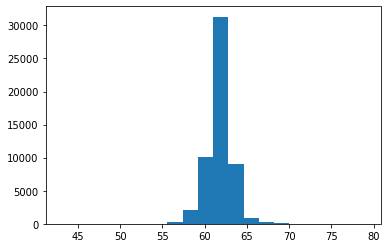

In [13]:
# Não há necessidade de preencher o código.
# O _ indica que o valor retornado pela função não será utilizado
_ = plt.hist(diamond_df.depth, bins=20) # Note que o bins é uma variável opcional do método

###### Exercício 4.5 (não avaliado)

Como antes, tente alterar o parâmetro `bins` e plotar novamente o histograma (tente não copiar e colar o código, escrevê-lo irá ajudá-lo a aprender e internalizar melhor como chamar a função). Fique à vontade para explorar outra variável do dataset como quiser.

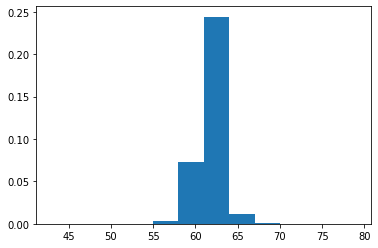

In [70]:
# Escreva sua resposta aqui:
_ = plt.hist(diamond_df.depth, bins=12,density = True)

### 4.3. Medidas de posição

Geralmente queremos representar um conjunto de dados a partir de apenas alguns valores que sejam representativos do todo. Geralmente usamos as medidas de posição (ou localização) central, que são a média, moda e mediana.

#### 4.3.1. Média
A média aritmética simples, ou simplesmente média, é a medida de tendência central mais popular e usada no dia-a-dia. Ela é obtida dividindo-se a soma dos valores pela quantidade de elementos.

Em termos matemáticos, calculamos a média como:
\begin{equation*}
\bar{x} = \frac{1}{N}\sum\limits_{k=1}^{N}x_k
\end{equation*}
onde $\bar{x}$ representa a média, $N$ a quantidade de dados e $x_k$ o valor do k-ésimo dado.

Como já aprendemos a calcular a média tanto em matrizes numéricas como em um  Pandas df (dataframe), vamos relembrar com um exercício.


##### Exercício 4.6
Obtenha a média da medida de preço dos diamantes (variável `price`) usando o método  `mean()` das bibliotecas:
1. NumPy
2. Pandas

In [15]:
# Escreva sua resposta aqui:
pd_mean = pd.DataFrame.mean(diamond_df['price'])
print("Média com Pandas: ", float(pd_mean))


price = np.array(diamond_df.price) # Converte um pandas df em um numpy array

# Escreva sua resposta aqui:
np_mean = np.mean(diamond_df['price'])
print("Média com NumPy: ", float(np_mean))

Média com Pandas:  3932.799721913237
Média com NumPy:  3932.799721913237


#### 4.3.2. Mediana
A mediana corresponde ao **valor central** de um conjunto de dados que foram previamente ordenados de forma crescente, separando a metade maior e a metade menor desses dados. Se o número de amostras for igual, tomamos a média dos dois valores centrais.
 
<img src="https://i.imgur.com/3fEikig.png" alt="as" width="350" />

A vantagem de usar a mediana em relação à média é que a mediana é menos susceptível a mudanças quando existem valores excepcionalmente altos ou baixos dentro de um conjunto de dados. Assim, em análises de dados onde existem muitos valores extremos, como por exemplo renda familiar ou outros ativos voláteis, a média pode ser distorcida por um pequeno número de valores extremamente altos ou baixos, enquanto a mediana pode dar uma ideia melhor de um valor típico do conjunto.

##### Exercício 4.7

Complete a função a seguir para calcular a mediana de uma coluna de um DataFrame. Caso tenha dúvidas, veja o exemplo da imagem acima.

In [41]:
def get_median_from_df(df, column_name):
    """
    Calcula a mediana da coluna 'column_name' do dataframe df
    Input: dataframe e nome da coluna para a qual deseja-se calcular a mediana
    Output: mediana (type: float)
    """
    
    # Converta os dados para um numpy array
    var_array = np.array(diamond_df.price)  

    # Obenha o número de elementos do array
    N =  var_array.size

    # Ordena o array com o método np.sort()
    ord_array = np.sort(var_array)
    
    # Verificando a pariddade do número de elementos
    if N % 2 == 1: # Se N for ímpar
        median = np.median(N)
    else: # Se N for par, então pega a média dos dois valores centrais
        median = sum(ord_array[N//2-1:N//2+1])/2.0
    
    return float(median)


# Verifique seus resultados
price_50 = get_median_from_df(diamond_df, column_name='price') # Use a função que criamos para calcular a mediana da coluna 'price'
print("Mediana calculada: ", price_50)
print("Mediana do Pandas: ", float(diamond_df.price.median()))
print("Mediana do Numpy: ", float(np.median(diamond_df.price)))

Mediana calculada:  2401.0
Mediana do Pandas:  2401.0
Mediana do Numpy:  2401.0


#### 4.3.3. Moda
A moda representa o **valor mais frequente** no conjunto de dados.

Diferente da média e da mediana, a moda é especialmente útil em variáveis categóricas, em que a média e a mediana não podem ser definidas. Por exemplo, a moda da amostra

`['maçã', 'banana', 'laranja', 'laranja', 'laranja', 'pêssego']` é laranja

##### Exercício 4.8
Retorne o valor mais comum da variável `color` **usando a tabela de frequências**. Depois, compare seus resultados com a função [`mode()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html) da biblioteca Pandas.

In [17]:
# Crie a tabela de frequência
color_counts = pd.crosstab(index=diamond_df['color'], columns='count')

print("color_counts: \n", color_counts) # Visualizando a tabela de frequências

# Ordene pela frequência ('count')
color_counts_ord = color_counts.sort_values(by='count', ascending=False)

# Pegando os índices dos valores ordenados por sua frequência
ordered_idx = color_counts_ord.index

# Pegue o primeiro ou último elementos da lista, dependendo da forma como você ordenou a lista
mode = ordered_idx[0]

print("Moda pela tabela de frequências: ", mode)
print("Moda pelo Pandas:                ", diamond_df.color.mode())

color_counts: 
 col_0  count
color       
D       6775
E       9797
F       9542
G      11292
H       8304
I       5422
J       2808
Moda pela tabela de frequências:  G
Moda pelo Pandas:                 0    G
Name: color, dtype: object


#### 4.3.4 Comparação entre as medidas
Normalmente usamos a média como a única medida de tendência central de um conjunto de dados ou variável. No entanto, quando os dados têm muitos *outliers* (falaremos mais sobre isso mais tarde), valores extremos ou não possuem uma distribuição normal, a média pode não ser a melhor escolha. Abaixo encontra-se um quadro resumindo as vantagens e desvantagens de utilizar cada uma das medidas de tendência central apresentadas.

| Medida | Vantagens | Desvantagens |
|-|-|-|
| Média | Leva em conta todos os valores dos dados | É influenciada por *outliers* |
| Mediana  | Menos sensível a *outliers* do que a média | Ordenamento é custoso em grandes quantidades de dados |
| Moda    | Adequada para o uso com variáveis categóricas | Não tem nenhuma propriedade matemática útil |

#### 4.3.5. Percentil/Quartil

Um percentil é uma medida utilizada na estatística descritiva que indica **o valor abaixo do qual uma determinada percentagem de observações se situa**. Por exemplo, o 20º percentil é o valor abaixo do qual 20% das amostras presentes no conjunto de dados podem ser encontradas.

O **25º percentil é também conhecido como o primeiro quartil ou quartil inferior** ($Q_1$), o **50º percentil como mediana ou segundo quartil** ($Q_2$), e o **75º percentil como terceiro quartil ou quartil superior** ($Q_3$).

##### Exercício 4.9
Obtenha os quartis da variável `price` usando:

1. A função `percentile()` da biblioteca numpy
2. A função `quantile()` da biblioteca pandas

In [18]:
# Escreva sua resposta aqui:
inter_q_quant = diamond_df.price.quantile([.25], interpolation = 'linear') # quantile: de 0 a 1
print("1º quartil - função quantile:   ", inter_q_quant)

inter_q_perc = np.percentile(diamond_df.price, 75) # percentile: de 0 a 100 (%)
print("3º quartil - função percentile: ",inter_q_perc)

# Não altere as linhas abaixo
# Convertendo formato das variáveis para compatibilidade com a submissão
q_quant_1 = float(inter_q_quant)
q_perc_3 = float(inter_q_perc)

1º quartil - função quantile:    0.25    950.0
Name: price, dtype: float64
3º quartil - função percentile:  5324.25


##### Exercício 4.10
E, por fim, resumindo a variável `price`

In [56]:
# Mínimo (float)
min_price = int(diamond_df.price.min())
# Primeiro quartil
quartil_price_1 = int(diamond_df.price.quantile(0.25))
# Média
mean_price =  int(diamond_df.price.mean()) 
# Mediana
median_price =  int(diamond_df.price.median() )
# Terceiro quartil 
quartil_price_3 =  int(diamond_df.price.quantile(0.75))
# Máximo 
max_price =  int(diamond_df.price.max())

print("Variável PRICE",
      "\nMínimo: ", float(min_price), 
      "\n1º Quartil: ", float(quartil_price_1),
      "\nMédia", float(mean_price),
      "\nMediana", float(median_price),
      "\n3º Quartil", float(quartil_price_3),
      "\nMáximo:", float(max_price))

Variável PRICE 
Mínimo:  326.0 
1º Quartil:  950.0 
Média 3932.0 
Mediana 2401.0 
3º Quartil 5324.0 
Máximo: 18823.0


### 4.4. Medidas de Dispersão
As medidas de dispersão são valores estatísticos que têm como objetivo **determinar o grau de variabilidade dos dados a partir de um conjunto de valores**.

Num conjunto de dados, se todas as amostras de uma variável estão próximas, isso indica uma dispersão baixa, e que os diferentes elementos não são muito diferentes com relação a essa variável. Por outro lado, se as observações estão dispersas, isso indica diferenças entre as observações.

A utilização das medidas de dispersão em conjunto com as de tendência central (média, mediana, moda) torna a análise de uma amostra mais precisa, e são as propriedados mais usadas. Enquanto as variáveis de tendência ou posição ajudam a encontrar a caracerística homogênea nos dados, as medidas de dispersão são um indicador de como os dados estão espalhados em torno do centro.

#### 4.4.1. Amplitude
Uma medida de dispersão bastante intuitiva é a **amplitude dos dados**, definida como a diferença entre os valores máximo e mínimo no *dataset*, ou seja:

\begin{equation*}
A = \max - \min
\end{equation*}

Como essa medida considera apenas dois valores, qualquer que seja o tamanho do conjunto de dados, ela tem propriedades limitadas para descrever a dispersão dos dados.

##### Exercício 4.11
Determine a amplitude da variável `price` usando as funções  `min()` e `max()` das bibliotecas:
1. NumPy
2. Pandas

In [20]:
# Escreva sua resposta aqui:
price = np.array(diamond_df.price) # Converte um pandas df em um numpy array
range_np = price.max() - price.min()
range_pd = price.max() - price.min()
print("Amplitude pelo Numpy", range_np)
print("Amplitude pelo Pandas",range_pd)

# Não altere as linhas abaixo
# Convertendo formato das variáveis para compatibilidade com a submissão
range_np = float(range_np)
range_pd = float(range_pd)

Amplitude pelo Numpy 18497
Amplitude pelo Pandas 18497


<a id='std_form'></a>
#### 4.4.2. Variância
A variância é determinada pela média dos quadrados dos desvios, onde o desvio é a diferença entre o valor observado e a média da amostra de dados. O cálculo é baseado na seguinte fórmula:

\begin{equation*}
s^2 = \frac{1}{N-1} \sum\limits_{k=1}^{N} (x_k - \bar{x})^2
\end{equation*}

Onde
* $s^2$: variância
* $x_k$: valor observado
* $N$: número de elementos no conjunto observado
* $\bar{x}$: média aritimética da amostra

Talvez você esteja se perguntando sobre o $- 1$ do denominador $N - 1$ pois você pode já ter visto essa fórmula sem essa parte, ou não esteja tão claro o que significa! É que, quando estamos fazendo análise em cima de toda a população o denominador fica $N$, mas, quando estamos falando apenas de uma amostra, o denominador ganha esse novo termo, que é chamado de **Correção de Bessel** e serve para reduzir o viés da amostra, aumentando a variância especialmente nos casos em que temos poucos dados!

#### 4.4.3. Desvio padrão
O desvio padrão (em inglês, *standard deviation*) é definido como a raiz quadrada da variância. Desta forma, a unidade de medida do desvio padrão será a mesma que a unidade de medida dos dados, o que não acontece com a variância.


Assim, o desvio padrão é encontrado pelo equacionamento:
\begin{equation*}
s =  \sqrt{s^2}
\end{equation*}

Quanto mais próximo de 0 é o desvio padrão, menor é a dispersão dos dados. Com isso, quando todos os valores de uma amostra são iguais, o desvio padrão é igual a 0.

##### Exercício 4.12
Preencha o código em branco da função `get_variance_from_df()` e verifique se a variância e o desvio padrão (*std*) correspondem aos retornados pelas funções da biblioteca Pandas.

In [21]:
# Escreva sua resposta aqui:
def get_variance_from_df(df, column_name):
    """
    Obtem a variância do nome_da_coluna do dataframe df
    Input: dataframe e nome da coluna para a qual se deseja calcular a variância
    Output: variância (type: float)
    """

    # Converte os dados em um numpy array
    var_array = np.array(df[column_name])
    
    # Obtem o número de elementos do array
    N = var_array.shape[0] # ou len(var_array)

    # Obtem a média dos dados em column_name
    mean_array = var_array.mean()
    
    # Escreva sua resposta aqui:
    variance = df[column_name].var()
    
    return float(variance)


def get_std_deviation_from_df(df, column_name):
    """
    Obtem o desvio padrão do nome_da_coluna do dataframe df
    Input: dataframe e nome da coluna para a qual se deseja calcular o desvio padrão
    Output: desvio padrão (type: float)
    """

    return float(math.sqrt(get_variance_from_df(df, column_name)))


variance = get_variance_from_df(diamond_df, 'price')
std_deviation = get_std_deviation_from_df(diamond_df, 'price')

print("Variância calculada: ", variance)
print("Desvio padrão calculado: ", std_deviation)

# Verifique seus resultados
print("Variância calculada:   ", variance)
print("Variância pelo Pandas: ", diamond_df.price.std()**2)
print("Desvio padrão calculado:   ", std_deviation)
print("Desvio padrão pelo Pandas: ",diamond_df.price.std())

Variância calculada:  15915629.42430145
Desvio padrão calculado:  3989.439738146379
Variância calculada:    15915629.42430145
Variância pelo Pandas:  15915629.42430145
Desvio padrão calculado:    3989.439738146379
Desvio padrão pelo Pandas:  3989.439738146379


#### 4.4.4. Distância Inter-Quartil

A amplitude interquartil, intervalo interquartil (IIQ) ou *interquartile range* (IQR) é a diferença entre o primeiro e o terceiro quartil. Desse modo, dentro desta distância interquartil encontra-se 50% dos nossos dados.

##### Exercício 4.13
Obtenha a amplitude interquartil da variável `price` usando:

1. A função `percentile()` da biblioteca numpy
2. A função `quantile()` da biblioteca pandas

In [22]:
# Escreva sua resposta aqui:
inter_q_quant = diamond_df.price.quantile(.75) -  diamond_df.price.quantile(.25) # quantile: de 0 a 1
print("IIQ pela função quantile:   ", inter_q_quant)

inter_q_perc = np.percentile(price, 75) - np.percentile(price, 25) # percentile: de 0 a 100 (%)
print("IIQ pela função percentile: ",inter_q_perc)

# Não altere as linhas abaixo
# Convertendo formato das variáveis para compatibilidade com a submissão
inter_q_quant = float(inter_q_quant)
inter_q_perc = float(inter_q_perc)

IIQ pela função quantile:    4374.25
IIQ pela função percentile:  4374.25


##### Exercício 4.14 (não avaliado)

Na aula de Pandas, aprendemos uma função que resume todas as métricas que analisámos anteriormente. Esta função chama-se `describe()`. Experimente-a na célula abaixo.


In [23]:
# Escreva sua resposta aqui:
diamond_df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [24]:
diamond_df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### 4.4.5. Box Plot

O *box plot* (ou diagrama de caixa) é uma representação gráfica que permite a visualização de uma variável de forma simples, dando uma noção das medidas de tendência central e de dispersão em um só lugar. Ele pode ser utilizado para identificar outliers, avaliar se a distribuição dos dados é simétrica, se os dados estão agrupados, ou até se eles estão enviesados ou não.

Abaixo verá os principais valores necessários para construir um gráfico de caixa.

<img src="https://pro.arcgis.com/en/pro-app/help/analysis/geoprocessing/charts/GUID-0E2C3730-C535-40CD-8152-80D794A996A7-web.png" alt="drawing" width="300"/>

Para construir um box plot em Python, é só usar a função [`boxplot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html) da biblioteca `matplotlib`

Rode o código abaixo para ver o boxplot da variável `price`

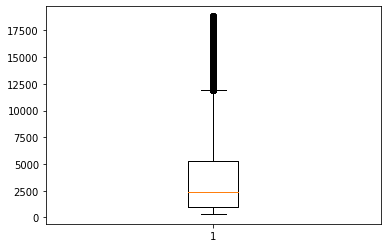

In [25]:
_ = plt.boxplot(diamond_df['price'])

Podemos ver que temos muitos outliers, que são os preços que fogem da nossa expectativa! No Box-Plot os circulos pretos podem até aparecer uma barra de tão juntos que estão, mas são os diversos outliers!

Além disso, conseguimos identificar que a mediana está perto de 2500 graficamente (barra laranja) e que o 3º quartil (topo do quadrado) está em torno de 5000, em linha do que já vimos anteriormente!

Com esse box-plot podemos entender que 75% dos diamantes custam até 5000 dólares, aproximadamente, porém há, ainda assim, um grande número de diamantes com preços muito elevados, acima de 12500! Isso nos leva a crer que esses diamantes caríssimos não são uma questão de sorte inexplicada, mas que deve haver algum fator, ou conjunto de fatores, que eleva o preço de um diamante a patamares tão altos dada a frequência desse acontecimento.

### 4.5. Correlação

Usamos a correlação para avaliar o quanto pares de variáveis de um mesmo dataset estão relacionados. Entender essas relações é útil para um melhor entendimento do dataset, e para compreender porque podemos usar uma variável para realizar alguma previsão (veremos isso melhor em outras aulas).

Dependendo do conjunto de variáveis no dataset, podemos facilmente inferir e reconhecer pares de variáveis que têm uma forte correlação. Por exemplo, se tiver um conjunto de dados de residências, como preços, tamanho, quantidade de banheiros, bairro, pode-se fazer a hipótese de que o preço e o tamanho estão fortemente correlacionados.

Contudo, nem sempre é fácil identificar estas relações entre as variáveis, ou mesmo descobrir as mais fortes. Para tal, avaliamos o **coeficiente de correlação** entre essas variáveis.

#### 4.5.1. Coeficiente de correlação

O coeficiente de correlação entre duas variáveis é um valor quantitativo (escalar) usado para avaliar quanto uma variável depende da outra. Ele dá um indicativo tanto de direção quanto de intensidade da tendência das duas variáveis variarem em conjunto.

Existem várias técnicas e métricas de correlação disponíveis para diversas situações. Neste curso, utilizaremos o mais comum, que é chamado de **coeficiente de correlação de Pearson** (representado por $r$).

Neste curso, não vamos entrar no detalhe de como funciona a matemática por trás dos bastidores, mas sim nos concentraremos em como ler este coeficiente. Na imagem abaixo, é possível ver diferentes valores para a métrica do R ao quadrado.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/Distance_Correlation_Examples.svg/400px-Distance_Correlation_Examples.svg.png" alt="drawing" width="450"/>


O coeficiente de correlação de Pearson é um número real que varia de -1 a +1, e indica o quanto as duas variáveis possuem uma correlação linear. Um $r$ próximo de +1 indica uma relação linear crescente entre as duas variáveis (ou seja se uma aumenta, a outra também o faz de forma proporcional), já próximo de -1, há uma relação linear decrescente. Valores de $r$ próximos de 0 indicam que não há uma dependência linear entre as variáveis, mas note na imagem que elas podem ter outros tipos de dependência.

#### 4.5.2. Matriz de correlação

Uma das melhores formas de ter um panorama geral de como as variáveis de um dataset estão relacionadas é através da Matriz de Correlação, que dá os coeficientes de correlação entre cada par de variáveis. Bem simples, não é? 

Felizmente, os objetos Pandas DataFrame já têm um método para calcular esta Matriz para nós. Na célula seguinte, temos um exemplo de como traçar a matriz de correlação.

In [26]:
diamond_df.corr().round(2) # pega a matriz de correlação do DataFrame
# A função .round() permite o arredondamento dos dados, para facilitar a leitura

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.00,-0.38,-0.03,-0.10,-0.31,-0.41,-0.40,-0.40
carat,-0.38,1.00,0.03,0.18,0.92,0.98,0.95,0.95
depth,-0.03,0.03,1.00,-0.30,-0.01,-0.03,-0.03,0.09
table,-0.10,0.18,-0.30,1.00,0.13,0.20,0.18,0.15
price,-0.31,0.92,-0.01,0.13,1.00,0.88,0.87,0.86
x,-0.41,0.98,-0.03,0.20,0.88,1.00,0.97,0.97
y,-0.40,0.95,-0.03,0.18,0.87,0.97,1.00,0.95
z,-0.40,0.95,0.09,0.15,0.86,0.97,0.95,1.00


Em seguida, temos um código para mostrar a tabela acima em formato de gráfico! Não se preocupe em decorar todos os detalhes para fazer a figura, mas foque em interpretá-la e ver como a tabela acima se traduz na imagem abaixo! No exemplo, a cor vermelha indica correlação positiva (diretamente proporcionais) e a azul indica correlação negativa (inversamente proporcionais).

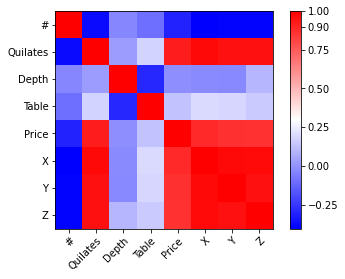

In [27]:
from matplotlib import cm as cm

corr = diamond_df.corr() # pega a matriz de correlação do DataFrame
labels = ['#', 'Quilates', 'Depth', 'Table', 'Price', 'X', 'Y', 'Z'] # As variáveis numéricas que estão em nossa matriz de correlação

# Plotando a matriz
fig, ax = plt.subplots() #Preparar a figura
cmap_bwr = cm.get_cmap('bwr') #Buscar o colormap (mapa de cores, cmap) chamado 'BWR', ele é o Blue-White-Red (Azul-Branco-Vermelho)
cax = ax.imshow(corr, cmap=cmap_bwr) #Mostrar nossa matriz de correlação, seguindo o cmap anterior

ax.set_xticks(np.arange(len(labels))) #Adicionar todas as marcações no eixo X
ax.set_yticks(np.arange(len(labels))) #Adicionar todas as marcações no eixo Y

ax.set_xticklabels(labels) #Escrever todas as marcações no eixo X
ax.set_yticklabels(labels) #Escrever todas as marcações no eixo Y

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor") #Deixar o eixo X com as marcações inclinadas

fig.colorbar(cax, ticks=[-0.25,0,.25,.50,.75,.9,1]) #Colocar uma barra de legenda ao lado
plt.show() #E mostrar na tela

Com isso podemos analisar como a variável `price` está intimamente ligada à variável `carat` e às variáveis de dimensão do diamante, `x`, `y` e `z`. Além disso, as variáveis `depth` e `table` são inversamente proporcionais e essas duas variáveis não tem grande relação com qualquer outra

#### 4.5.3. Scatter Plot

Outra ferramenta útil para entender como duas variáveis se comportam entre elas é traçando o *Scatter Plot* (ou Gráfico de dispersão).  Neste gráfico, os dados são exibidos como um aglomerado de pontos, onde cada ponto é um dado do dataset e sua posição é definida pelo valor do dado na posição da variável representada no eixo horizontal e o valor da outra variável do eixo vertical.

O Scatter Plot é normalmente utilizado para entender se existe alguma correlação entre as características (variáveis) e, se sim, ele ajuda a determinar se a correlação é positiva ou negativa. Se os pontos apresentam um padrão inclinado vindo da esquerda para a direita e de baixo para cima, isso indica uma correlação positiva entre as variáveis em estudo. Se o padrão de pontos segue uma inclinação da parte superior esquerda para a parte inferior direita, isso indica uma correlação negativa.

Para uma visualização ainda mais clara, é possível ter uma terceira dimensão indicando a densidade (concentração) de pontos numa determinada região do gráfico. Na célula seguinte, é mostrada uma forma simples de traçar um Scatter Plot. Para explorar outros métodos de visualização de duas variáveis, [clique aqui](https://www.kaggle.com/residentmario/bivariate-plotting-with-pandas).

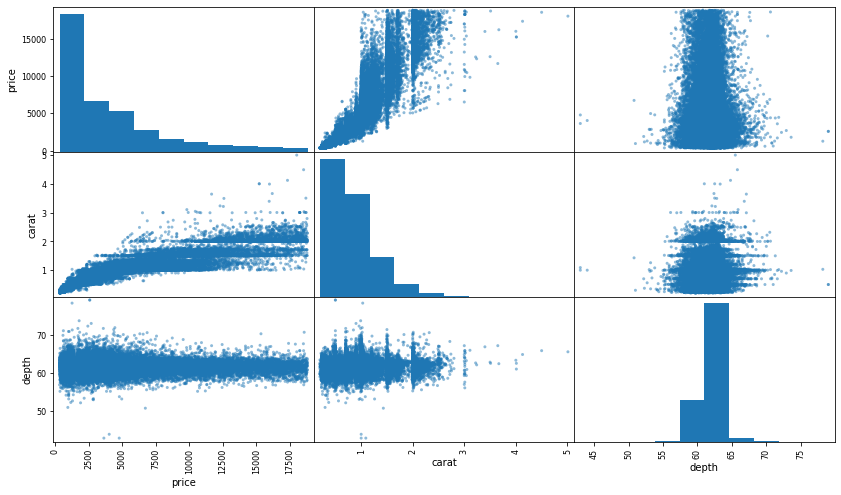

In [28]:
# Produz uma matriz das variáveis, par a par
# A opção figsize = (14,8) permite definirmos um tamanho específico da visualização, facilitando a visualização
pd.plotting.scatter_matrix(diamond_df[['price', 'carat', 'depth']], figsize = (14,8), diagonal = 'hist');

#### 4.5.4. Correlação não implica uma causalidade!

Um equívoco realmente comum ao analisar dados é inferir que a correlação implica uma causa (ou seja, uma variável causa a outra). Isso não é necessariamente verdade! Vamos ilustrar isto com um exemplo simples. Vamos pensar que, quando chove, Jennifer prefere ficar em casa. Mas também, quando chove, o ar fica húmido, o que faz com que a sua alergia ataque. Se Jennifer esquece que a chuva foi a causa para ela ficar em casa, ela pode atribuir erroneamente que o fato de não sair fez com que a sua alergia apareça! Mas, na verdade, a chuva é a causa de ambos os eventos.

Esse exemplo pode parecer óbvio, mas, na maioria das vezes, é difícil encontrar todas as variáveis que influenciam um determinado evento e a sua ordem causal. Então, da próxima vez que alguém disser que uma variável causou outra por estarem altamente correlacionadas, duvide disso!

<a id='prob'></a>
## 5. Fundamentos da Teoria da Probabilidade

#### 5.1. Variáveis aleatórias

As variáveis aleatórias são definidas como qualquer variável cujos possíveis resultados dependem de um fenómeno aleatório. 

Um exemplo de uma variável aleatória é um que já vimos: o resultado do lançamento de um dado, que pode dar qualquer número entre 1 e 6. Embora possamos conhecer os seus possíveis resultados, o resultado em si depende do acaso. Assim, uma variável aleatória pode ser uma medição de um parâmetro que pode gerar valores diferentes.

Existem dois grandes grupos de variáveis aleatórias: **numéricas** e **categóricas**.

Acho que essa divisão não nos é estranha, não é mesmo? Se você não lembra da diferença entre esses dois, explicamos ela na seção [4.1 Tipos de variáveis](#variables) da parte 1

### 5.2. Distribuições de probabilidade

Apesar de aleatórios, ao longo da história foi preciso entender como determinados fenômenos iríam se comportar. Assim, as distribuições de probabilidade são usadas para descrever de forma matemática a característica com que um fenômeno aleatório se manifesta.

Em outras palavras, as distribuições de probabilidade são modelos matemáticos (ou funções) que relacionam um certo valor da variável em estudo com a sua probabilidade de ocorrência. Antes de eu jogar um dado, por exemplo, eu não sei qual o número que sairá no dado, mas podemos saber a chance de cada possibilidade!

Como a Teoria da Probabilidade é toda uma área de estudo da Matemática, não desanime caso você não entenda os passos matemáticos, a matemática é para construir a base teórica! 

<img src = "https://i.imgur.com/7SsqFe5.jpg" alt="drawing" width="450"/>

*aprendendo sobre Probabilidade e Estatística *

Tente focar em entender os conceitos. Novamente, caso tenha dúvidas, não deixe de mandar lá no nosso servidor do Discord, combinado?

Além disso, o site [seeing-theory](https://seeing-theory.brown.edu/index.html)  permite visualizar de forma simples muitos dos conceitos que vamos ensinar aqui, então não deixe de conferir e brincar um pouco por lá!

Dito isso, vamos nessa!


#### 5.2.1. O que é a função massa de probabilidade (fmp)?

Como dissemos na seção anterior, uma variável aleatória numérica discreta é uma variável que pode assumir um número contável de valores possíveis, e, ao realizar uma medição dessa variável, cada valor possível tem uma certa probabilidade de ocorrer.

Descrevendo de forma matemática, geralmente denotamos uma variável aleatória como $X$. Assim o valor da função de massa de probabilidade corresponde à probabilidade de a variável $X$ assumir um determinado valor $x$. Apesar de serem denotadas pela mesma letra, o $X$ maiúsculo representa a variável aleatória e o $x$ minúsuclo representa o valor da ocorrência da V.A.. Numa notação matemática, podemos escrever isto como:

\begin{equation*}
P(X = x) \text{, ou simplesmente } p(x)
\end{equation*}

Por exemplo, no lançamento de dados temos seis resultados possíveis (1, 2, 3, 4, 5, 6), cada um deles com uma probabilidade igual a 1/6 de ocorrer. Ou seja, podemos escrever que:

\begin{equation*}
P(X = 1)=p(1)=\frac{1}{6}
\end{equation*}
\begin{equation*}
P(X = 2)=p(2)=\frac{1}{6}
\end{equation*}
<center>
...
</center>

Podemos ler isso como "A probabilidade da minha observação, que é o número no dado, ser igual à 1 é de 1/6".

É comum representar a função massa de probabilidade utilizando gráficos onde o eixo x apresenta todos os valores possíveis para a variável e o eixo y apresenta as probabilidades desses valores (ou a **função massa de probabilidade - f.m.p.**).

Abaixo, utilizamos algumas linhas de código para traçar o gráfico da f.m.p.

##### Exemplo 1

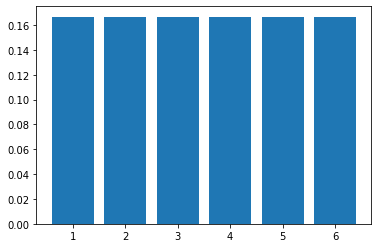

In [29]:
# definindo todos os resultados possíveis
x_axis = [1, 2, 3, 4, 5, 6]

# definindo a probabilidade associada a cada valor
y_axis = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

# plotando a fmp
plt.bar(x_axis, y_axis)
plt.show()

Em nosso exemplo dos diamantes, a qualidade do diamante é uma variável aleatória discreta! Não conseguimos saber qual a qualidade antes de um especialista determinar, mas podemos descobrir a chance de ser de cada classe, baseado em nosso conjunto de dados!

Isso foi exatamente o que vimos no começo nessa aula com a `crosstab` com a opção `normalize = True`

In [30]:
pd.crosstab(index=diamond_df["cut"], columns="count", normalize=True)

col_0,count
cut,
Fair,0.029848
Good,0.090953
Ideal,0.399537
Premium,0.255673
Very Good,0.223990


Isso quer dizer que a chance de um diamante ser 'Ideal', que significa o nível de qualidade mais alta, em nossa base de dados, é de 0.399537 ou de 39.95%, aproximadamente!

Porém, algo importante a se considerar é que estamos limitados à essa base de dados! Pode ser que essa base não represente todos os diamantes do mundo, de todos os países, por exemplo, então não podemos generalizar sem conhecimento do que essa base de dados tenta representar!

#### 5.2.2. O que é a função densidade de probabilidade?

Por outro lado, temos também variáveis aleatórias contínuas, que, ao contrário das discretas, têm infinitos resultados possíveis. Isto significa que a **probabilidade de uma variável contínua ser exatamente igual a um único número x é zero**.

Sim, existem eventos que têm probabilidade zero, o que não quer dizer que são impossíveis! Parece bem estranho, não é? Para entendermos melhor, vamos pegar o número:

3.141592653589793238462643383279502884197169399375105820974944592307...

(também conhecido como **pi** ou $\pi$, e tem infinitas casas decimais).

A probabilidade de um número ser exatamente igual a um número que tem infinitas casas decimais é nula! Caso queira entender melhor, assista esse vídeo do canal 3Blue1Brown [Why “probability of 0” does not mean “impossible”](https://youtu.be/ZA4JkHKZM50).

Usando a mesma notação matemática que na sessão anterior:

\begin{equation*}
 P(X = x) = p(x) = 0
\end{equation*}

Assim, quando estamos lidando com variáveis contínuas, nunca esperamos que estas tenham um valor preciso. Em vez disso, medimos a probabilidade de ela estar dentro de um certo intervalo de valores. Por exemplo, estar entre a e b:

\begin{equation*}
 P(a < X < b) = p(a, b)
\end{equation*}

##### Exemplo 2

Imagine um carro que andou do km 0 para o km 10 com velocidade constante. Agora digamos que queremos tirar uma foto desse carro no trajeto, mas a câmera só alcança o trajeto entre 0km e 1,75km. Se quisermos tirarmos uma foto aleatória desse carro em qualquer momento do trajeto, qual é a probabilidade de o carro aparecer na foto? (ou seja, de estar antes do quilômetro 1,75?)

Bom, como a velocidade é constante, a probabilidade é a mesma em qualquer posição entre 0 e 10 (parecido com o exemplo de jogar dados, mas o carro pode estar no km 0, no km 3.2 ou km 1.259282613987).

Dito isto, podemos usar a mesma lógica para construir uma **função de densidade de probabilidade**. É comum nos referirmos a essas funções por sua sigla, então perdão se parecer rude, mas a sigla dessa função é f.d.p. (ou pdf, do inglês *probability densitiy function*).

\begin{equation*}
pdf = f(x) = \frac{1}{10-0}
\end{equation*}

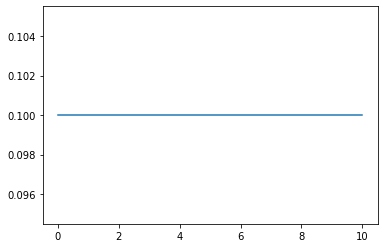

In [31]:
# definindo alguns dos valores possíveis da posição do carro (quanto mais valores, mais preciso é o plot)
x_axis = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10]

# definindo a densidade de probabilidade associada a cada valor
y_axis = (1/(10-0))*np.ones(len(x_axis)) # Obtendo um array de mesmo tamanho de x_axis com os valores (1/10) em cada casa

# plotando os gráficos
plt.plot(x_axis, y_axis)
plt.show()

Como discutimos, a pdf não têm um sentido físico claro, mas ela tem uma propriedade muito importante: para qualquer distribuição, a **área em baixo do gráfico da função de densidade de probabilidade é igual à probabilidade de uma variável contínua estar dentro intevalo dessa área**. 

Assim, se quisermos calcular a probabilidade de o carro estar entre 0 e 1,75, calculamos a área abaixo da curva da função de densidade entre 0 e 1,75. Neste caso particular, a área pode ser simplesmente calculada como a área do retângulo:

\begin{equation*}
 p(0, 1.75) = (1.75 - 0)*\frac{1}{10-0} = 0.175
\end{equation*}

Agora voltando à nossa base de dados de diamantes, a variável carat é uma V.A. contínua! Ela depende de uma medição e, pode ser que o diamante seja de 0.5 quilates ou 0.5000001 quilates!

Vamos tentar identificar a chance de encontrarmos um diamante de menos de 600 dólares!

In [32]:
price_600 = len(diamond_df[diamond_df['price'] <= 600])
N = len(diamond_df)

perc_600 = price_600 / N
print("P(price <= 600) = ", perc_600)


P(price <= 600) =  0.07667779013718946


Logo, a chance de um diamante custar 600 dólares ou menos é de 0.0766 ou 7.66%!

#### Exercício 5.1
Tente calcular a probabilidade de encontrarmos um diamante com mais de 4mm de largura!

In [33]:
N = len(diamond_df)
perc_x_4 = len(diamond_df['z'] <= 600) / N
print("P(X > 4) = ", perc_x_4)

P(X > 4) =  1.0


#### 5.2.3. Função distribuição acumulada

Outra forma útil de determinar a probabilidade de um evento é usando a **função distribuição acumulada** (fda) ou *Cumulative distribution function* (cdf). A fda é definida como a probabilidade de a variável ser inferior a um determinado x. É comum representar uma pdf (função de densidade de probabilidade) como $f(a,b)$ e uma fda como $F(x)$:

\begin{equation*}
F(x) = P(X < x)
\end{equation*}

Usando a propriedade da pdf, podemos determinar a fda como sendo a área em baixo do gráfico da pdf até determinado valor $x$.

<center>
<img src = "https://i.imgur.com/UvRKGcj.gif" alt="drawing" width="300"/>
</center>

\begin{equation*}
 F(x) = P(X < x) = p(-\infty, x)
\end{equation*}

Note-se que ao utilizar a fda, inserimos como parâmetro apenas um único valor $x$, que representa um intervalo (de menos infinito a esse valor) e que nos permite calcular a probabilidade de a variável ser menor do que aquele valor.

Utilizando o exemplo do carro, podemos calcular a fda para calcular a probabilidade de o carro estar antes do quilômetro 1,75 da seguinte forma:

Para todo x entre 0 e 10:

\begin{equation*}
f(x) = \frac{1}{10-0}=0.1
\end{equation*}

Assim, a área do retângulo até o valor x é dada por:

\begin{equation*}
F(x) = P(X<x)= (x-0) \cdot \frac{1}{10-0}
\end{equation*}

(se você souber integral e quiser fazer esse cálculo para verificar que dá igual, fique à vontade!)

Agora que calculámos a fda do carro, sabemos que, para qualquer posição $x$ do carro entre 0 e 10, a probabilidade de o carro estar antes dessa posição é de $0,1\cdot x$. Agora, vamos traçar a curva da fda e verificar se o nosso cálculo anterior estava correto!

##### Exemplo 3

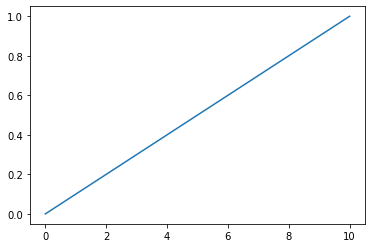

A probabilidade de o carro estar antes do km 1,75 é de: 0.175


In [34]:
def fda(x):
    y = 0.1*x
    return y

# aqui, usamos um array para poder facilmente multiplicar os valores na função fda
x_axis = np.asarray([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10])

# definindo a probabilidade acumulada associada a cada valor
y_axis = fda(x_axis)

# plotando os valores (sim, ainda estamos te devendo ensinar como usar o plot, mas te juro que logo logo chegaremos lá)
plt.plot(x_axis, y_axis)
plt.show()
print("A probabilidade de o carro estar antes do km 1,75 é de: {:.3f}".format(fda(1.75)))

#### 5.2.4. Propriedades importantes das fdp's e fda's

Estamos quase terminando toda a teoria por trás dessas funções, eu prometo que só faltam mais algumas equações!

Você pode estar se perguntando ~"Oh meu Deus, este sofrimento vai acabar?"~ "Ei, qualquer função pode ser uma função de probabilidade?". E a resposta é NÃO! (para ambas as perguntas rs). Como estamos falando de probabilidade, existem três propriedades principais:

Como todos nós somos pessoas **apaixonadas** por equações matemáticas, vamos escrevê-las corretamente usando as nossas definições de fdp e fda.

1.   Nenhum evento tem mais do que 100% de chance de acontecer, ou $\text{max}[P(x)] = 1$
2.   A probabilidade de todos os resultados possíveis deve ser de 100%
3.   Finalmente, **não existe probabilidade negativa**. Isto significa que todos os valores da fdp são sempre não negativos e a fda é sempre uma função não decrescente.

### 5.3. Distribuição gaussiana ou normal

Como vimos, as variáveis aleatórias estão em todos os lugares! Além disso, existem alguns padrões, ou formatos, mais comuns das probabilidades! Por exemplo, se imaginarmos um gráfico que mostra as probabilidades de cada valor ao rolar um dado de 6 faces e se imaginarmos um gráfico que mostra a chance de tirar uma carta de um baralho de 52 cartas veremos muitas semelhanças!

É claro que no dado temos 6 lados, com chance de $1/6$ de tirarmos qualquer face, enquanto que no baralho a chance de tirar uma carta é de $1/52$. Porém a chance é a mesma pra cada face do dado, e para carta, não há uma carta com mais chance.

Esse "formato", ou distribuição das probabilidades se chama uniforme, por exemplo, onde a chance é a mesma para cada possibilidade do meu universo! É algo bem comum, está nos dados, cartas, jogar cara ou coroa de moedas, etc!



Porém outro formato bem comum é uma distribuição com um pico onde há a maior chance do evento ocorrer, e quanto mais próximo desse pico, maior é a probabilidade!

Exemplificando! Se formos medir a altura dos brasileiros veremos que a maioria tem em torno de 1,70m! Mas a chance de encontrarmos alguém com 1,71m é bem alta também, praticamente igual à chance de encontrarmos alguém com 1,69m!

Há chance de encontrar alguém com 1,9m mas será bem menor que 1,70m! E essa chance será igual à encontrar alguém de 1,50m, nesse exemplo!

<center>
<img src = "
https://www.researchgate.net/profile/Stephen_Zubrick/publication/264533994/figure/fig1/AS:614220462821377@1523452978655/An-example-of-a-normal-distribution-height-distributions.png" alt="heights" width="700"/>
</center>

Esse formato, ou distribuição, é a gaussiana, ou chamada de normal! Ela tem o forma de um sino e a média é igual a mediana, sendo simétrica!

Ela é muito usada na estatística por descrever bem fenômenos naturais onde alguma característica tem maior incidência na média e diminui sua frequência a medida que se afasta dela (como, por exemplo, a altura de uma população). Além disso, essa função é muito poderosa! Apenas com uma média e uma variância podemos gerar funções completamente diferentes.

<img src = "https://i.imgur.com/glimE9J.png" alt="drawing" width="400"/>

Como vimos na parte anterior, a média influencia em qual valor estão concentrados o valor das amostras, e a variância nos diz o quanto os valores estão dispersos! Na seção 4.3.2 geramos um gráfico com um formato bem parecido com a normal, não é?

Pois é! Existe até um teorema muito importante que diz que **quando o tamanho da amostra aumenta, a distribuição da média de uma variável aleatória aproxima-se cada vez mais de uma distribuição normal**. Esse é o Teorema do Limite Central (TLC).

Este processo pode ser visualizado na animação abaixo. O primeiro gráfico corresponde à distribuição da variável aleatória (pode ser de **qualquer tipo**, não necessariamente uma distribuição gaussiana/normal).

O segundo mostra agrupamentos de $N=5$ amostras da distribuição. Finalmente, o gráfico final mostra o **histograma da média das amostras**.

<img src="https://i.imgur.com/Dh5OHoB.gif" alt="as" width="350"/>

Você pode brincar com esse tipo de problema [aqui](http://onlinestatbook.com/stat_sim/sampling_dist/index.html) ou [aqui](https://seeing-theory.brown.edu/probability-distributions/index.html#section3)! Sinta-se à vontade para experimentar diferentes distribuições de amostras e ver que todas convergem para uma distribuição normal!

O que você acha que acontece se aumentarmos aos poucos $N$, o número de amostras que usamos para calcular a média? Intuitivamente, podemos esperar ver a média variar cada vez menos a medida que aumentamos o número de amostras, certo? Isso mesmo!

Nesta aula específica saber que as variáveis independentes aleatórios se comportam como uma normal pode não significar muito, mas muitos modelos de inteligência artificial usam essa propriedade para fazer previsões dos dados! Além disso, essa função é importante para diversas áreas, e certamnete você irá se deparar com ela caso escolha se aprofundar em alguns tópicos da ciência de dados! Por enquanto saber que ela existe e da propriedade do TLC é o suficiente!

### 5.4. Teorema de Bayes

Antes de apresentar o Teorema de Bayes, precisamos entender o conceito de probabilidade condicional. Vejamos o seguinte exemplo:
Uma empresa tem 2 fábricas diferentes que produzem peças para automóveis (F1, F2). Cada fábrica tem um número de peças com defeito (D) e não defeituosas (ND), de acordo com os seguintes dados:

In [35]:
# Criando um DataFrame com as informações de produção
total_production = pd.DataFrame({'F1':[30,70],
                                 'F2':[10,90]},
                                index=['D', 'ND'])

# Criando a coluna 'total'
total_production['total'] = total_production['F1'] + total_production['F2']

# Criando a linha total
total_row = total_production.sum(numeric_only=True)
total_row.name = "Total"

# Apendando a linha no DataFrame
total_production.append(total_row, ignore_index=False)

C:\Users\jojos\AppData\Local\Temp\ipykernel_5872\3024324866.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_production.append(total_row, ignore_index=False)


,F1,F2,total
D,30,10,40
ND,70,90,160
Total,100,100,200


Se escolhermos uma peça de produção defeituosa aleatória, qual é a probabilidade de ser da fábrica 1? Olhando o espaço de amostra de D, notaremos 40 peças defeituosas, sendo 30 de F1.

Assim, nossa probabilidade seria:

\begin{equation*}
 P(F1|D) = \frac{30}{40} = \frac{3}{4}
\end{equation*}
<br>
A notação $\ P(F1|D) =$ significa a probabilidade de a peça ser da fábrica 1, dado que ela é uma peça defeituosa

Poderíamos, também, conseguir o mesmo resultado aplicando a seguinte equação:

\begin{equation*}
 P(F1|D) = \frac{P(F1 \cap D)}{P(D)} = \frac{30/200}{40/200} = \frac{3}{4}
\end{equation*}

O símbolo $\cap$ usado acima significa a "interseção". Ele é usado para obter o conjunto de elementos que pertencem simultaneamente a dois conjuntos, e pode ser substituído na leitura pelo termo **e**.

Assim, podemos ler a equação acima como: a probabilidade de a peça ser da fábrica 1, dado que ela é uma peça defeituosa, é igual à probabilidade de a peça ser defeituosa **e** ser da fábrica 1, dividido pela probabilidade de a peça ser defeituosa.

**De forma geral**
<br>
\begin{equation*}
P(A\cap B) = P(A|B) \cdot P(B)
\end{equation*}

Lemos a equação como: a probabilidade de $A$ **e** $B$ acontecerem é igual à probabilidade de $A$ acontecer, sabendo que $B$ ocorreu, multiplicado pela probabilidade de ocorrência de $B$.

Dessa forma, o **Teorema de Bayes** é relacionado com a **probabilidade condicional** e descreve a probabilidade de um evento, baseado em um conhecimento prévio que pode estar relacionado ao evento. Com isso, ele pode ser usado para estimar uma probabilidade a partir de diferentes hipóteses, à medida que novas evidências são observadas.

Ele pode ser escrito matematicamente como:
\begin{equation*}
P(A|B)   = \frac{P(B|A) P(A)} {P(B)}
\end{equation*}

#### Exercício 5.2
Estime a $P_Y$ de um diamante ser ideal, a $P_Z$ de um diamante ter mais de 1 quilate e a probabilidade (p_1) do diamante ter mais de 1 quilate, sabendo que ele é ideal

In [52]:
# Estimando a probabilidade de um diamante ser ideal
p_Y = len(diamond_df[diamond_df.cut == 'Ideal']) / len(diamond_df)

# Estime a probabilidade de um diamante ter mais de 1 quilate
diamond_df['carat_1_quilate'] = (diamond_df.carat > 1)
p_Z = diamond_df[diamond_df.carat > 1]

# Selecione apenas o grupo de diamantes ideial
ideal_diamond = diamond_df[diamond_df.cut == 'Ideal']

# Agora estime a probabilidade de um diamante ter mais de 1 quilate
# sabendo que ele é ideal
p_1 = ideal_diamond.carat_1_quilate.mean()

# Printando os resultados
print('p_Y =', round(p_Y,3))
print('p_Z =', round(p_Z,3))
print('p_1 =', round(p_1,3))

p_Y = 0.4
p_Z =        Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
172           173   1.17  Very Good     J      I1   60.2   61.0   2774  6.83   
215           216   1.01    Premium     F      I1   61.8   60.0   2781  6.39   
241           242   1.01       Fair     E      I1   64.5   58.0   2788  6.29   
242           243   1.01    Premium     H     SI2   62.7   59.0   2788  6.31   
247           248   1.05  Very Good     J     SI2   63.2   56.0   2789  6.49   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53698       53699   1.05       Fair     H     SI2   64.8   55.0   2717  6.39   
53793       53794   1.01  Very Good     I     SI1   63.3   59.0   2730  6.26   
53875       53876   1.04  Very Good     I      I1   61.6   61.0   2745  6.45   
53879       53880   1.04       Fair     G     SI2   65.2   57.0   2745  6.25   
53897       53898   1.02       Good     H      I1   64.3   63.0   2751  6.28   

          y     z  cara

Beleza! Mas o que significam estes números? Antes de continuar a ler a resposta **pense nessas perguntas abaixo**, pois elas podem dar bons insights:

1. O que significa $p_Y$ ser aproximadamente $0,4$? Isso é desejável?
2. $p_1$ diminuiu comparado ao $p_Z$? Será que segregar dessa forma nos deixou mais próximos de encontrarmos nosso `target`? Isso faz sentido?

Tem certeza de que já pensou nas perguntas de cima? Ótimo! Então vamos tentar responder a estas perguntas:

1.  **O que significa $p_Y$ ser aproximadamente $0,4$? É desejável?**
* Existem 5 categorias de diamantes em nossa base de dados, sendo 'Ideal' a qualidade máxima. Caso tivéssemos dados proporcionais, cada classe de qualidade teria 20%! Em nosso caso temos um grande número de diamantes 'Ideal' e poucos 'Fair' e 'Good', que são de qualidade menor! Isso pode ser um problema, pois o nosso conjunto de dados não é totalmente **balanceado**, apesar de não estar tão longe disso também! 

* Em ciência de dados é muito desejável ter uma proporção parecida em todas as classes pois conseguiríamos aprender melhor sobre o que torna um diamante 'Fair' e 'Good', por exemplo, para evitar o 'Enviesamento'! Uma das conseqüências do enviesamento dos dados é que fazer inferências estatísticas com base nestes dados não nos daria boas estimativas sobre os parâmetros reais.

2.  **$p_1$ diminuiu comparado ao $p_Z$?**
* Nesse caso sim! Aparentemente selecionar apenas entre os diamantes ideais não nos deixou mais próximos de identificarmos diamantes de mais de um quilate! Nesse caso, a chance de encontrarmos um diamante com mais de 1 quilate ao acaso é maior que a chance de encontrarmos um diamante de mais de 1 quilate, sabendo que ele tem uma qualidade alta! 

#### Exercício 5.3

Com base nas probabilidades estimadas anteriormente, use o **Teorema de Bayes** para calcular a probabilidade condicional de o diamante ser Ideal dado que ele tem mais de 1 quilate. Isto é, a probabilidade de:

\begin{equation*}
P\left(\;Y = Ideal\;|\;X > 1\;\right) = \frac{P\left(\;X > 1\;|\;Y = Ideal\;\right) P\left(\;Y = Ideal\;\right)} {P\left(\;X > 1\;\right)}
\end{equation*}

In [ ]:
# Escreva sua resposta aqui:
p_2 = (p_Y*p_Z)/p_1 
 
print(p_2)

Olha só! A probabilidade de acharmos um diamante Ideal dentre aqueles com mais quilates é de 21%! Menor do que acharmos ao acaso. Logo, não seria bom construirmos um modelo que identifica diamantes perfeitos com base no peso dele (ou quilates)!

Sempre é bom fazer hipóteses em relação a nossos dados e validá-las antes de aplicar qualquer modelo de machine learning.

### 5.5. Relação entre Probabilidade e Estatística

Probabilidade e Estatisstica podem parecer muito semelhantes entre si, mas, na verdade, resolvem problemas inversos. Em Probabilidade, partimos de um processo que contém alguma incerteza (expressa através de variáveis aleatórias) e estudamos o que acontece de acordo com a aleatoriedade do processo. Por outro lado, na Estatística, começamos analisando alguns dados e tentamos encontrar o processo aleatório que está por trás de nossas observações.

É por isso que a Probabilidade é tão importante para a Estatística: a probabilidade nos dá as ferramentas para as respostas que estamos buscando. Assim, nosso trabalho em Estatística é encontrar qual dessas ferramentas é a correta para o problema com o qual estamos lidando. Quanto mais variáveis aleatórias você conhecer e souber como trabalhar, mais fácil e mais preciso será seu trabalho!

#### 5.5.1. Exercício extra

Agora, deixe as calculadoras e Python de lado por um minuto. Você pode resolver este exercício sem nenhum cálculo, basta pensar no problema.

Este é um problema famoso da segunda guerra mundial. Os aviões dos Aliados estavam sendo fortemente derrubados pelo armamento alemão. Eles precisavam de uma armadura melhorada para lidar com todo o poder de fogo disparado sobre eles. O problema é:
* Um avião com pouca blindagem não aguenta muitos tiros e será derrubado facilmente.
* Um avião com forte blindagem é menos manobrável e consome mais combustível por ser mais pesado.

Os aviões que voltavam de campanhas na Europa tinham buracos de bala por toda a fuselagem. Entretanto, os militares perceberam que **os furos não estavam uniformemente distribuídos** por toda a aeronave! Então, eles reuniram dados sobre a localização dos furos e contrataram um grupo de Estatísticos para decidir onde ficava o melhor lugar para fortalecer a blindagem. Aqui estão os dados fornecidos:

<img src = "https://i.imgur.com/SxVcrvS.jpg" width="450" >
<img src = "https://i.imgur.com/ZGqBG9v.jpg" width="450" >

Para você, onde os militares deveríam fortaceler a blindagem dos aviões? **[Resposta ao final da aula](#bonusex)**.

<a id='infstats'></a>
## 6. Inferência estatística

Até agora, lidamos apenas com medidas e descrições de nossos dados. Existe um universo de possibilidades que podemos fazer com eles, como prover novos resultados! Esse processo é chamado de inferência estatística, que é o ramo da Estatística que estuda como utilizar dados de uma amostra para inferir informações sobre toda a população!

Como essa aula é introdutória, nosso objetivo é familiarizar vocês com os termos e conceitos mais importantes, que serão usados na construção de modelos robustos em outras etapas do curso!

### 6.1 Hipóteses
O primeiro passo para pensarmos em previsões de dados é estruturarmos qual a previsão queremos fazer! Por exemplo, uma hipótese que podemos ter é que um diamante com mais quilates terá um preço maior. 

Porém, no universo da estatística, geralmente provamos por contradição! Nesse caso, uma hipótese que poderemos querer provar que é falsa é a de que diamantes pequenos são tão caros quanto os diamantes grandes! Nesse caso, podemos definir que essa é nossa **hipótese nula $H_0$**, que é uma alegação inicial.

Em complemento à essa, temos a **hipótese alternativa $H_1$**, que seria o contrário da anterior e é aquela que acreditamos que é a verdadeira! Nesse caso, a hipótese alternativa poderia ser que diamantes grandes são mais caros que pequenos, e não tem o mesmo preço como a Hipótese Nula diz!

Além disso, a hipótese alternativa pode ser unilateral, no caso em que dizemos que diamantes grandes são mais caros que pequenos, ou bilaterais quando dizemos que diamantes grandes tem um preço diferente dos pequenos, seja para mais ou para menos!


### 6.2 Erros estatísticos

Nenhum teste, inferência ou modelo de inteligência artificial é 100% preciso! Há sempre a chance de encontrarmos a conclusão errada e é importante entender os tipos de erros que podem surgir em testes de hipóteses!

O **erro do tipo I** ocorre quando a hipótese nula é verdadeira e você a rejeita, ou aponta que ela não é verdadeira! Esse erro é chamado de $\alpha$ e é o nível de significância. Se o $\alpha$ vale 0.05 significa que, se você rejeitar a hipótese nula você aceita os 5% de chance de estar errado!

O **erro do tipo II** ocorre quando a hipótese nula é falsa mas você não a rejeita! Esse erro depende do poder do teste estatístico que você usou, que varia de acordo com a quantidade de amostras, por exemplo! No nosso exemplo anterior, caso tivéssemos apenas 5 dados o erro do tipo II, ou chamado de $\beta$, é bem maior do que se tivermos 5000 dados, por exemplo!

Outro termo muito recorrente e relacionado ao erro do tipo I é o **p-valor** ou **valor-p**. Ele representa a probabilidade de se obter um dado, por exemplo, igual ou mais extremo que aqueles da amostra! Por exemplo, imagine que um modelo determinou que o custo de um diamante é de 100 dólares, mas todos os dados apontam que isso é muito difícil. Nesse caso, um p-valor de 0.001 indicaria que há 0.1% de chance de termos esse caso acontecendo na realidade! O p-valor **não** é a probabilidade da hipótese nula estar errada ou certa,

<a id='bonus_ex'></a>
### Resposta do exercício extra

Abraham Wald, um dos matemáticos contratados, apresentou uma perspectiva brilhante sobre o problema:

**O reforço da couraça dos aviões não deve ir onde as balas estão. Ele deve ir onde as balas não estão: o motor!**.

Ele sabia que, teoricamente, os danos deveriam ser distribuídos igualmente por todo o avião, portanto, os locais sem furos de balas deveriam ter algo estranho. Com isso, ele então percebeu que os locais sem buracos de balas estavam justamente em aviões que não haviam retornado!

**A razão pela qual os aviões que voltaram tiveram poucos danos sobre os motores é que os aviões com motores danificados tinham caído.** 

Este é mais um exemplo da importância de conhecer e explorar seu conjunto de dados. No nosso conjunto de dados, tínhamos uma amostra totalmente desequilibrada (apenas dados dos aviões que não haviam caído), o que distorceu a variável dos buracos de bala por pé quadrado no motor.